# Coronavirus

Explore discussions on Twitter about coronavirus.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import date
from collections import defaultdict

plt.style.use('seaborn')

In [2]:
# Class to embed tweets
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

## Load data

In [3]:
tweets = pd.read_csv('data/tweets_010119_250120.csv', parse_dates=['formatted_date'])

In [4]:
tweets.shape

(321180, 20)

## Process data

In [5]:
# remove columns used in the search
tweets.drop(['key', 'key_group', 'key_mention', 'key_group_mention'], axis=1, inplace=True)

In [6]:
# rename columns
tweets.rename(columns={'date': 'datetime', 'formatted_date': 'formatted_datetime'}, inplace=True)

In [7]:
tweets.head()

,tweet_id,user_id,tweet,datetime,formatted_datetime,retweets,favorites,mentions,hashtags,geo,urls,permalink,username,lang,tweet_length,word_count
0,1220134080932696072,1057027456765452293,The continuing 2019-nCoV epidemic threat of no...,2020-01-23 01:00:08,2020-01-23 01:00:08+00:00,0,0,NaN,#science #research,NaN,https://www.ncbi.nlm.nih.gov/m/pubmed/31953166/,https://twitter.com/researchphilia/status/1220...,researchphilia,es,273,36
1,1220134674887892993,165080514,BREAKING: The Wuhan #coronavirus most likely c...,2020-01-23 01:02:30,2020-01-23 01:02:30+00:00,174,188,NaN,#coronavirus #2019nCoV #WuhanCoronavirus #wuha...,NaN,https://onlinelibrary.wiley.com/doi/abs/10.100...,https://twitter.com/richardvolle/status/122013...,richardvolle,es,219,22
2,1220134704529190913,1102688399570452480,"Lo más correcto sería ponerle "" 2019-nCoV "", y...",2020-01-23 01:02:37,2020-01-23 01:02:37+00:00,0,0,NaN,NaN,NaN,NaN,https://twitter.com/FauReyC/status/12201347045...,FauReyC,es,147,24
3,1220135328050184192,1663541358,No existe vacuna ni tratamiento disponible par...,2020-01-23 01:05:05,2020-01-23 01:05:05+00:00,0,0,NaN,#recomendaciones #coronavirus,NaN,http://ow.ly/2trt50y2pAa,https://twitter.com/QuadratinMexico/status/122...,QuadratinMexico,es,180,25
4,1220135597320409089,223226324,New analysis on @biorxivpreprint from Michael ...,2020-01-23 01:06:10,2020-01-23 01:06:10+00:00,3,6,@biorxivpreprint @NIH,#2019nCoV,NaN,https://www.biorxiv.org/content/10.1101/2020.0...,https://twitter.com/nycbat/status/122013559732...,nycbat,es,176,21


In [8]:
# remove empty rows
tweets.dropna();

In [9]:
tweets.shape

(321180, 16)

In [10]:
# remove duplicates
unique_tweet_ids = tweets.tweet_id.unique()
tweets.drop_duplicates(subset='tweet_id', keep='first', inplace = True) 

In [11]:
assert tweets.shape[0]==len(unique_tweet_ids), 'Drop duplicate operation failed!'

In [12]:
# create a date colum
tweets['date'] = tweets.loc[:,'formatted_datetime'].dt.date

Filter out tweets that are older than 31st December 2019, date of the [first reported case](https://www.who.int/emergencies/diseases/novel-coronavirus-2019) of coronavirus

In [13]:
start_date = date(2019, 12, 31)
start_date = pd.to_datetime(start_date, utc=False)
tweets = tweets[tweets['date'] >= start_date]

In [14]:
tweets.shape

(317399, 17)

---
## Evolution of tweets over time

In [15]:
# group tweets by date
tweets_by_date = tweets.groupby('date', as_index=False).count()

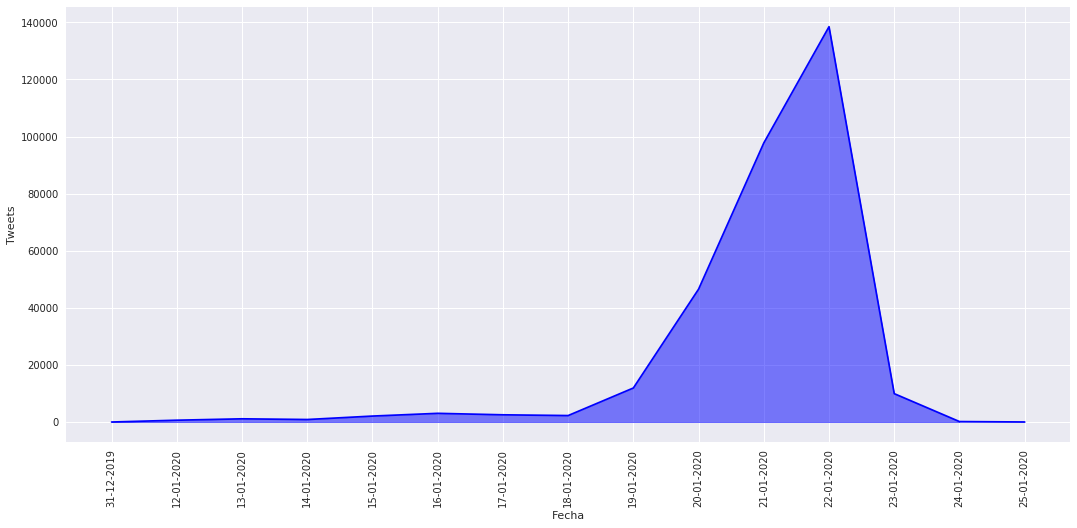

In [16]:
plt.figure(figsize=(18,8))
x_dates = list(pd.to_datetime(tweets_by_date['date']).dt.strftime('%d-%m-%Y'))
y_counts = list(tweets_by_date['tweet_id'])
fig = sns.lineplot(x=x_dates, y=y_counts, color='blue')
fig.set(xlabel='Fecha', ylabel='Tweets')
sns.set_style("dark", {'axes.grid': True})
fig.set_xticklabels(labels=x_dates, rotation=90)
plt.fill_between(x_dates, y_counts, alpha=0.5, color='blue')
plt.show()
#fig.get_figure().savefig("tweets_over_time.png", dpi=200, quality=95, bbox_inches="tight")

Let's explore what happened from 20-01-2020 onwards

In [17]:
start_date = pd.to_datetime(date(2020, 1, 21), utc=False)
end_date = pd.to_datetime(date(2020, 1, 23), utc=False)
tweets_bulk_period = tweets[(tweets['date'] >= start_date) & (tweets['date'] >= start_date)]

In [18]:
tweets_bulk_period.shape

(292911, 17)

In [19]:
print('{}% of all tweets were generated during this period'.format(
      round(100*tweets_bulk_period.shape[0]/tweets.shape[0], 0)))

92.0% of all tweets were generated during this period


In [20]:
# get hour of tweets
tweets_bulk_period['date_hour'] = tweets_bulk_period.loc[:,'formatted_datetime'].dt.strftime('%d-%m-%Y %H')

/home/jorge/Dropbox/Development/bsc/tw_coronovavirus/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# group tweets by date and hour
tweets_bulk_period_by_date_hour = tweets_bulk_period.groupby('date_hour').count()

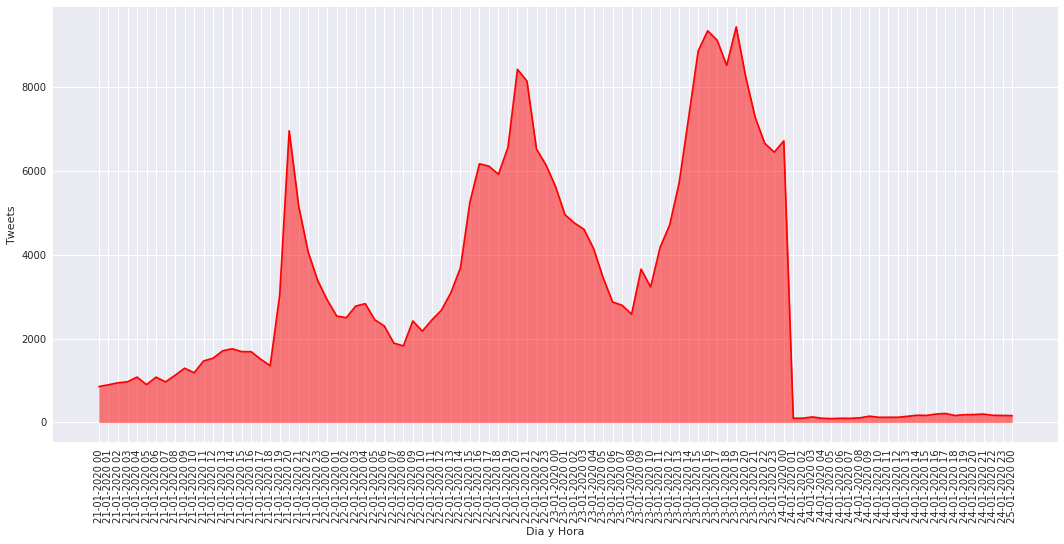

In [22]:
plt.figure(figsize=(18,8))
x_dates = list(tweets_bulk_period_by_date_hour.index)
y_counts = list(tweets_bulk_period_by_date_hour['tweet_id'])
fig = sns.lineplot(x=x_dates, y=y_counts, color='red')
fig.set(xlabel='Dia y Hora', ylabel='Tweets')
sns.set_style('dark', {'axes.grid': True})
fig.set_xticklabels(labels=x_dates, rotation=90)
plt.fill_between(x_dates, y_counts, alpha=0.5, color='red')
plt.show()

---

## Tweet Authors

In [23]:
tweets_by_author = tweets.groupby('username')

In [24]:
total_authors = len(tweets_by_author.groups)

In [25]:
print('There are {0} Twitter users that have posted tweets about coronavirus'.format(total_authors))

There are 172885 Twitter users that have posted tweets about coronavirus


#### Top-50 most active authors

In [26]:
tweets_authors_count = tweets_by_author.count()

In [27]:
tweets_authors_count.sort_values('tweet_id', ascending=False).head(50).index

Index(['PneumoniaWuhan', 'r__worldnews', 'poandpo', 'AndyVermaut',
       'ZyroFoxtrot', 'emiliomordini', 'TheArticleTrunk', 'AnalyticaGlobal',
       'mlnangalama', 'twosheeep1', 'dev_discourse', 'News247WorldPre',
       'makoto_au_japon', 'ElNacionalWeb', 'peruenlanoticia',
       'contrapuntovzla', 'raybae689', 'la_patilla', 'JCSura', '4PawShop',
       'dailystar', 'noticiasdelmun4', 'TheTop10News2', 'WHO', 'CNNEE',
       '24sante_fr', 'lasillarota', 'FluTrackers', 'crewislife',
       'XavierAbadMdG', 'BaronianConsult', 'HernanPorrasM', 'greg_folkers',
       'CaraotaDigital', 'ABSCBNNews', 'FreieWeltEu', 'AfricanPeacemag',
       'El_Cooperante', 'QPEV_', 'PulpNews', 'Barbara96913515', 'k29664911',
       'MuruganHospita3', 'Milenio', 'DelilahVeronese', 'CapitalEdomex',
       'IndoPac_Info', 'greeenorg', 'FxBookLTTG', 'Apex_WW'],
      dtype='object', name='username')

In [28]:
active_authors = list(tweets_authors_count.sort_values('tweet_id', ascending=False).head(50)['tweet_id'].index)
active_authors_tweets = list(tweets_authors_count.sort_values('tweet_id', ascending=False).head(50)['tweet_id'])

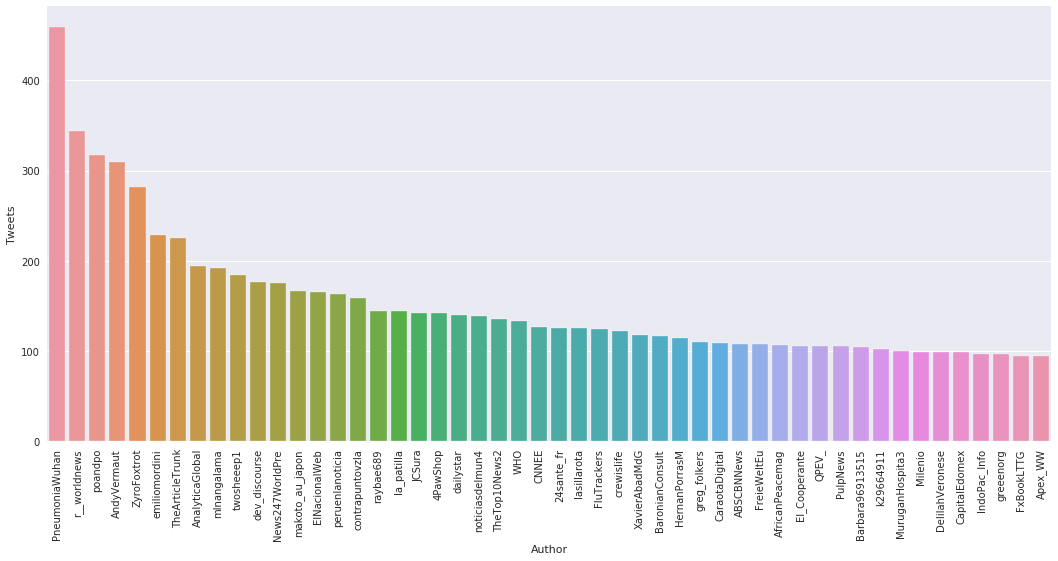

In [29]:
plt.figure(figsize=(18,8))
fig = sns.barplot(x=active_authors, y=active_authors_tweets)
fig.set(xlabel='Author', ylabel='Tweets')
fig.set_xticklabels(labels=active_authors, rotation=90)
plt.show()

#### Most mentioned users

In [30]:
tweets_with_mentions = tweets[~tweets['mentions'].isna()]

In [31]:
print('There are {} tweets with mentions in the text'.format(tweets_with_mentions.shape[0]))

There are 40287 tweets with mentions in the text


In [32]:
user_mentions = defaultdict(int)
for index, tweet in tweets_with_mentions.iterrows():
    mentions = tweet['mentions'].split()
    for mention in mentions:
        user_mentions[mention] += 1

In [33]:
user_mentions_df = pd.DataFrame.from_dict({'username': list(user_mentions.keys()), 
                                           'mention_count': list(user_mentions.values())})

In [34]:
# remove @ mention because there cannot be an user with @ as username
user_mentions_df = user_mentions_df[user_mentions_df['username']!='@']

Top-10 most mentioned users

In [35]:
# show the top-10 most mentioned users
user_mentions_df.sort_values('mention_count', ascending=False).head(10)

,username,mention_count
7,@WHO,2137
100,@YouTube,2128
15,@CDCgov,935
503,@MailOnline,698
873,@lopezobrador_,652
57,@SSalud_mx,503
325,@realDonaldTrump,493
617,@GoogleNews,441
56,@el_pais,330
593,@scmpnews,325


Top-50 most mentioned users

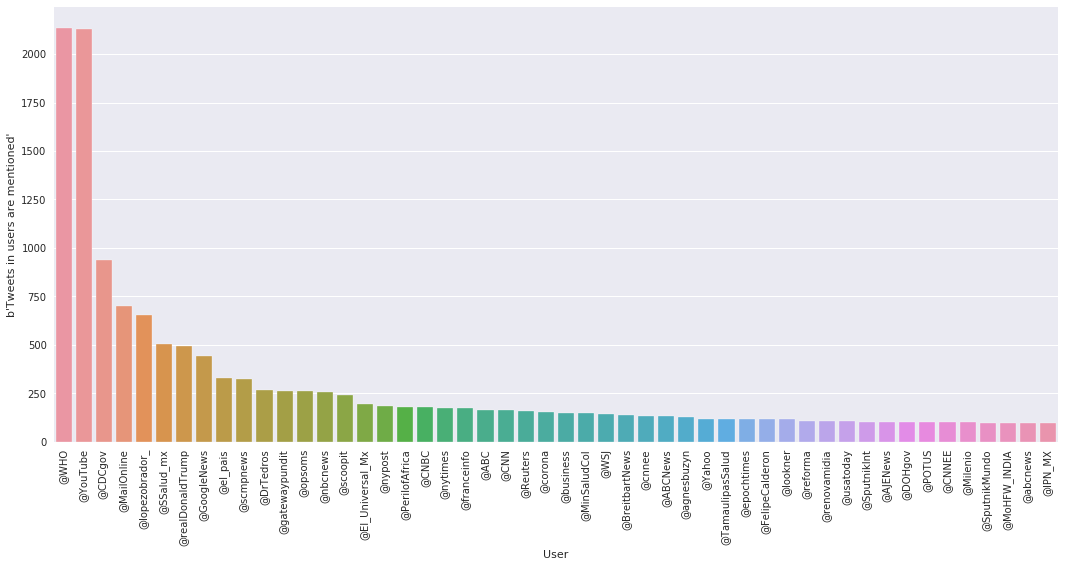

In [36]:
plt.figure(figsize=(18,8))
mentioned_users = list(user_mentions_df.sort_values('mention_count', ascending=False).head(50)['username'])
mentions_count = list(user_mentions_df.sort_values('mention_count', ascending=False).head(50)['mention_count'])
fig = sns.barplot(x=mentioned_users, y=mentions_count)
fig.set(xlabel='User', ylabel=b'Tweets in users are mentioned')
fig.set_xticklabels(labels=mentioned_users, rotation=90)
plt.show()

#### Tweets that mention surprised users (e.g., @YouTube, @lopezobrador, @SSalud_mx, @realDonaldTrump)

Tweets that mention **`@Youtube`**

In [37]:
tweets[tweets['mentions'].isin(['@YouTube'])][['tweet_id', 'username', 'tweet', 'datetime', 'urls', 'retweets']].sort_values('retweets', ascending=False).head(10)

,tweet_id,username,tweet,datetime,urls,retweets
236967,1219822897650372608,ElalborotoF,Mhoni Vidente predijo coronavirus que afectarí...,2020-01-22 04:23:36,https://youtu.be/_-0r7BP9zG8,28
167713,1220443236076072962,ShooterHatesYou,Bisogna preoccuparsi per il Coronavirus Cinese...,2020-01-23 21:28:36,https://youtu.be/R4d0LG8NuCk,22
251600,1219923774520406016,WyverShago,A Thread 1) Mysterious Coronavirus Confirmed i...,2020-01-22 11:04:27,https://youtu.be/BreUIR5jV_I,17
127171,1220371384120905728,Jabiertzo,China toma medidas drásticas contra epidemia d...,2020-01-23 16:43:06,https://youtu.be/tFS6oKgtvlk,14
186352,1220486240333635586,WyverShago,Update: Coronavirus Detected in Texas and Los ...,2020-01-24 00:19:29,https://youtu.be/yJ3ysUI9AN8,12
71672,1220191694332755969,WyverShago,#Coronavirus Two cases of Coronavirus suspecte...,2020-01-23 04:49:04,https://youtu.be/s7ABCJL5yhQ,11
312846,1220098024979886080,crnalexander,ALERTA DE SALUD POR BROTE EPIDEMIOLÓGICO DE NU...,2020-01-22 22:36:52,https://youtu.be/obSZMPoa9sc,10
188684,1220491499256864768,Michaelcraddo16,"Good vid... Coronavirus , Organic or Purposely...",2020-01-24 00:40:23,https://youtu.be/ZQOhja2Qnw4,9
246017,1219885122159357952,Annette_LEXA,Coronavirus en Chine : doit-on se sentir conce...,2020-01-22 08:30:52,https://youtu.be/qoBoryHuZ6E,9
154790,1220418697975812096,Liz_Estes,Coronavirus Patients Being Transported In Quar...,2020-01-23 19:51:06,https://youtu.be/AyF5UvEgz1Y,8


They are primarily videos posted through the Youtube's sharing function. The most retweeted one is shown below.

In [38]:
tweet_html = ("""
<blockquote class="twitter-tweet"><p lang="es" dir="ltr">Mhoni Vidente predijo coronavirus que afectaría a todo el mundo <a href="https://t.co/70gi3Y625t">https://t.co/70gi3Y625t</a> vía <a href="https://twitter.com/YouTube?ref_src=twsrc%5Etfw">@YouTube</a></p>&mdash; El Alboroto de los famosos (@ElalborotoF) <a href="https://twitter.com/ElalborotoF/status/1219822897650372608?ref_src=twsrc%5Etfw">January 22, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(tweet_html)

Tweets that mention **`@lopezobrador`**

In [39]:
tweets[tweets['mentions'].isin(['@lopezobrador'])][['tweet_id', 'username', 'tweet', 'datetime', 'retweets']].sort_values('retweets', ascending=False).head(10)

,tweet_id,username,tweet,datetime,retweets
139223,1220391793138655232,landayol07,El verdadero coronavirus lo tenemos en mexico ...,2020-01-23 18:04:11,2
262646,1219981557122969600,PdPagina,#FelizMiercoles el presidente @lopezobrador co...,2020-01-22 14:54:04,1
264563,1219987986739187714,alvarez_armando,En México hay un posible caso de #CoronaVirus ...,2020-01-22 15:19:36,1
274262,1220013197182357509,SilesJuarez,Agrega q tomo 40milmill del fondo de catástrof...,2020-01-22 16:59:47,1
263541,1219984749294309377,OroNoticiasPue,#ÚltimaHora El presidente Andrés Manuel López ...,2020-01-22 15:06:45,0
275357,1220015873186041856,GarzaZindy,Gadamdre y hasta cuándo te pronunciarás sobre ...,2020-01-22 17:10:25,0
313605,1220099825196097536,osonegro01,@lopezobrador Protegiendose del #coronavirus p...,2020-01-22 22:44:01,0


In [40]:
tweet_html = ("""
<blockquote class="twitter-tweet"><p lang="es" dir="ltr"><a href="https://twitter.com/hashtag/FelizMiercoles?src=hash&amp;ref_src=twsrc%5Etfw">#FelizMiercoles</a> el presidente <a href="https://twitter.com/lopezobrador?ref_src=twsrc%5Etfw">@lopezobrador</a> confirmó que hay un posible caso de <a href="https://twitter.com/hashtag/coronavirus?src=hash&amp;ref_src=twsrc%5Etfw">#coronavirus</a> en <a href="https://twitter.com/hashtag/Tamaulipas?src=hash&amp;ref_src=twsrc%5Etfw">#Tamaulipas</a>, explicó que el paciente está en observación.</p>&mdash; Pie de Página (@PdPagina) <a href="https://twitter.com/PdPagina/status/1219981557122969600?ref_src=twsrc%5Etfw">January 22, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(tweet_html)

Tweets that mention **`@SSalud_mx`**

In [41]:
tweets[tweets['mentions'].isin(['@SSalud_mx'])][['tweet_id', 'username', 'tweet', 'datetime', 'retweets']].sort_values('retweets', ascending=False).head(10)

,tweet_id,username,tweet,datetime,retweets
5793,1219412981005484033,MediCasos,Les dejamos este documento de la @SSalud_mx so...,2020-01-21 01:14:44,75
312639,1220097553607417863,CarlosLoret,Determina @SSalud_mx que darán cada 24 horas i...,2020-01-22 22:34:59,64
46005,1219733974450393090,Reforma,En medio de la nueva cepa del #coronavirus sur...,2020-01-21 22:30:15,42
296085,1220064823670661126,liderfiscal,La @SSalud_mx emite un aviso epidemiológico so...,2020-01-22 20:24:56,42
279299,1220025670715215873,CarlosTorresF_,Aquí algunos datos que debes conocer sobre el ...,2020-01-22 17:49:21,31
1975,1220388573955993601,RepasoENARMmx,Informe actualizado sobre el Nuevo CORONAVIRUS...,2020-01-23 17:51:24,27
116458,1220353706778120192,Pajaropolitico,La secretaría de @SSalud_mx informa que se han...,2020-01-23 15:32:51,24
276515,1220018818837372928,lajornadaonline,. @SSalud_mx confirmó que hay un posible caso ...,2020-01-22 17:22:07,23
69794,1220184482185007105,almagoch,La @SSalud_mx ha actualizado la información de...,2020-01-23 04:20:25,22
282847,1220034859470487552,almaguerpardo1,Hay una amenaza de enfermedad Catastrófica lla...,2020-01-22 18:25:52,22


In [42]:
tweet_html = (
"""<blockquote class="twitter-tweet"><p lang="es" dir="ltr">Les dejamos este documento de la <a href="https://twitter.com/SSalud_mx?ref_src=twsrc%5Etfw">@SSalud_mx</a> sobre coronavirus y la relación con <a href="https://twitter.com/hashtag/Wuhan?src=hash&amp;ref_src=twsrc%5Etfw">#Wuhan</a> <a href="https://t.co/Zim0TTKK4f">pic.twitter.com/Zim0TTKK4f</a></p>&mdash; El internista. (@MediCasos) <a href="https://twitter.com/MediCasos/status/1219412981005484033?ref_src=twsrc%5Etfw">January 21, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>"""
)
Tweet(tweet_html)

Tweets that mention **`@realDonaldTrump`**

In [43]:
tweets[tweets['mentions'].isin(['@realDonaldTrump'])][['tweet_id', 'username', 'tweet', 'datetime', 'retweets']].sort_values('retweets', ascending=False).head(10)

,tweet_id,username,tweet,datetime,retweets
187152,1220488147248861190,paulftheophilus,President @realDonaldTrump - close down the fl...,2020-01-24 00:27:04,90
117890,1220356138325200896,HanianEmpress,Free the refugees from the camps immediately @...,2020-01-23 15:42:31,62
290873,1220055192370143233,ElizabethEThorp,"Hard pass crimey, impeached President @realDon...",2020-01-22 19:46:40,42
148403,1220408445674848256,0ctoberReignz,#CoronaVirus @realDonaldTrump #QanonPhkYourPla...,2020-01-23 19:10:22,25
153980,1220417320482484225,0ctoberReignz,#CoronaVirus OMG - WTH????? November Of 2019 A...,2020-01-23 19:45:38,24
155511,1220419964420743174,gholland04,CDC raises Coronavirus Warning Level ... ...re...,2020-01-23 19:56:08,16
305819,1220082290996469763,DrJaneRuby,NO ENTRIES INTO US FROM CHINA - until this vir...,2020-01-22 21:34:20,14
305225,1220081198883577862,Notimex_TV,"| El presidente de Estados Unidos, @realDonald...",2020-01-22 21:30:00,14
171524,1220451751486279680,Tina_Mc_G,...then I checked for patents and BINGO! (I al...,2020-01-23 22:02:27,13
152372,1220414743661420544,0ctoberReignz,#CoronaVirus @realDonaldTrump #MASA #MakeAmeri...,2020-01-23 19:35:23,12


In [44]:
tweet_html = ("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">President <a href="https://twitter.com/realDonaldTrump?ref_src=twsrc%5Etfw">@realDonaldTrump</a> - close down the flights from Wuhan Coronavirus infected areas right now, before it is to late! <br>I believe drastic preventive measures must be taken. Better to be safe than sorry. <a href="https://t.co/Y7wSyJYCVt">https://t.co/Y7wSyJYCVt</a> <a href="https://t.co/HwdKaDtj5Y">pic.twitter.com/HwdKaDtj5Y</a></p>&mdash; Paul Theophilus (@paulftheophilus) <a href="https://twitter.com/paulftheophilus/status/1220488147248861190?ref_src=twsrc%5Etfw">January 23, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
"""
)
Tweet(tweet_html)

#### Most retweeted authors

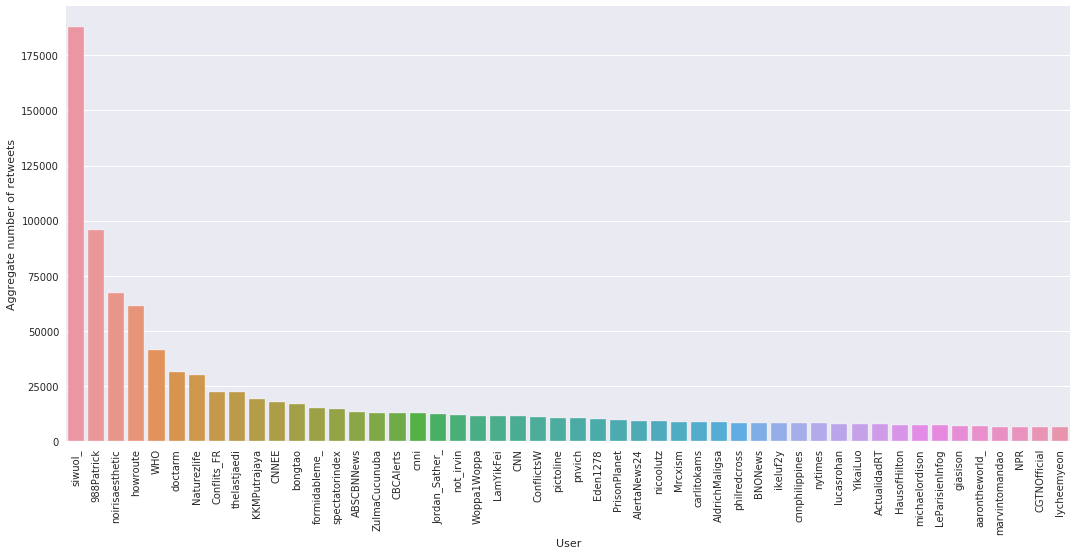

In [57]:
plt.figure(figsize=(18,8))
most_rt_users = list(tweets_by_author[['retweets']].sum().sort_values('retweets', ascending=False).head(50).index)
rts_count = list(tweets_by_author[['retweets']].sum().sort_values('retweets', ascending=False).head(50)['retweets'])
fig = sns.barplot(x=most_rt_users, y=rts_count)
fig.set(xlabel='User', ylabel='Aggregate number of retweets')
fig.set_xticklabels(labels=most_rt_users, rotation=90)
plt.show()

#### Most liked authors

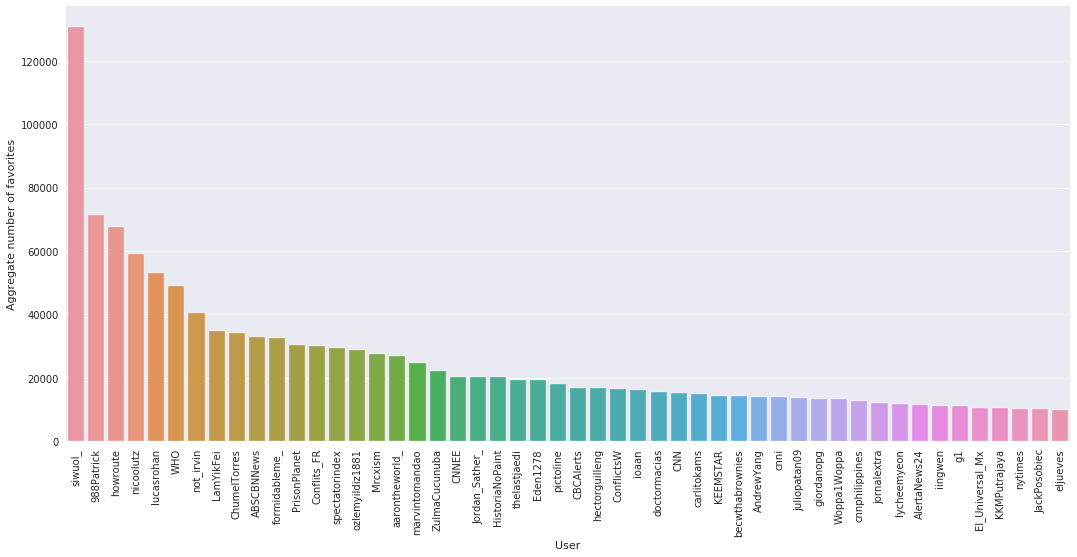

In [58]:
plt.figure(figsize=(18,8))
most_fav_users = list(tweets_by_author[['favorites']].sum().sort_values('favorites', ascending=False).head(50).index)
favs_count = list(tweets_by_author[['favorites']].sum().sort_values('favorites', ascending=False).head(50)['favorites'])
fig = sns.barplot(x=most_fav_users, y=favs_count)
fig.set(xlabel='User', ylabel='Aggregate number of favorites')
fig.set_xticklabels(labels=most_fav_users, rotation=90)
plt.show()

---
## Tweets

#### Most used hashtags (excluding coronavirus and alike)

#### Top-10 most retweeted tweets

In [257]:
tweets.sort_values('retweets', inplace=True, ascending=False)

/home/jorge/Dropbox/Development/bsc/tw_coronovavirus/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [264]:
tweets[['date', 'username', 'tweet_id', 'tweet', 'lang' ,'retweets']].head(10)

,date,username,tweet_id,tweet,lang,retweets
85175,2020-01-23,siwuol_,1220259934488547328,rt to save life #coronavirus pic.twitter.com/x...,es,187737
71257,2020-01-23,988Patrick,1220190098878271490,It’s not a joke . Share guys and stay safe #co...,es,95927
131236,2020-01-23,noirisaesthetic,1220378320333766656,มึงงง อันนี้คือข้างถนนเลย คนติดเชื้อ #ไวรัสโคโ...,es,48295
83964,2020-01-23,Naturezlife,1220255527705272320,”ทำไม #coronavirus สามารถแพร่กระจายอย่างรวดเร็...,es,23123
161375,2020-01-23,thelastjaedi,1220430582653640704,please read this and stay safe everyone #Coron...,es,22426
141062,2020-01-23,noirisaesthetic,1220394986836856832,อันนี้วูบล้มกันเห็นๆ เลย เหมือนว่าตอนนี้เหตุกา...,es,16983
8202,2020-01-21,bongtao,1219452062347350018,ตอนนี้ใครมีหน้ากากกันฝุ่น ใส่ตลอดเวลาที่อยู่ใน...,es,16970
26306,2020-01-21,formidableme_,1219655559302934529,SO ANG TRUE REASON SA BREAK-UP NG JADINE AY No...,es,15013
53260,2020-01-22,not_irvin,1219766920641052672,Kailan kaya mas magiging affected ang mga Fili...,es,11900
66994,2020-01-23,LamYikFei,1220174573338906624,Hong Kong’s first Wuhan coronavirus patient. 2...,es,11487


#### Most retweeted tweet

In [267]:
tweet_html = ("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">rt to save life <a href="https://twitter.com/hashtag/coronavirus?src=hash&amp;ref_src=twsrc%5Etfw">#coronavirus</a> <a href="https://t.co/xQ8z2ihrAu">pic.twitter.com/xQ8z2ihrAu</a></p>&mdash; siwuol 🐈 (@siwuol_) <a href="https://twitter.com/siwuol_/status/1220259934488547328?ref_src=twsrc%5Etfw">January 23, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(tweet_html)